In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
te = pd.read_csv('test_loan.csv')
te.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:
te.shape

(367, 12)

In [4]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# Missing value handling

In [5]:
te.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [6]:
# HANDLING CATEGORICAL MISSING VALUES

# Handling missing values of Gender

te['Gender'].value_counts()

Gender
Male      286
Female     70
Name: count, dtype: int64

In [7]:
gen_mode = te['Gender'].mode()[0]

In [8]:
te['Gender'].fillna(gen_mode, inplace = True)

In [9]:
# Handling missing values of Dependents

te['Dependents'].value_counts()

Dependents
0     200
2      59
1      58
3+     40
Name: count, dtype: int64

In [10]:
dep_mode = te['Dependents'].mode()[0]

In [11]:
te['Dependents'].fillna(dep_mode, inplace = True)

In [12]:
# Handling the missing values of Self_Employed

te['Self_Employed'].value_counts()

Self_Employed
No     307
Yes     37
Name: count, dtype: int64

In [13]:
self_mode = te['Self_Employed'].mode()[0]

In [14]:
te['Self_Employed'].fillna(self_mode, inplace = True)

In [15]:
te.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

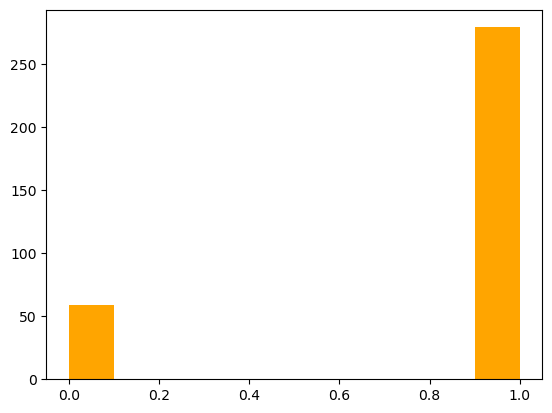

In [16]:
# HANDLING NUMBERICAL MISSING VALUES

# Handling the missing values of target variable Credit_History

plt.hist(te['Credit_History'], color = 'orange')
plt.show()

In [17]:
te['Credit_History'] = te['Credit_History'].fillna((te['Credit_History']).median())

In [18]:
te.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

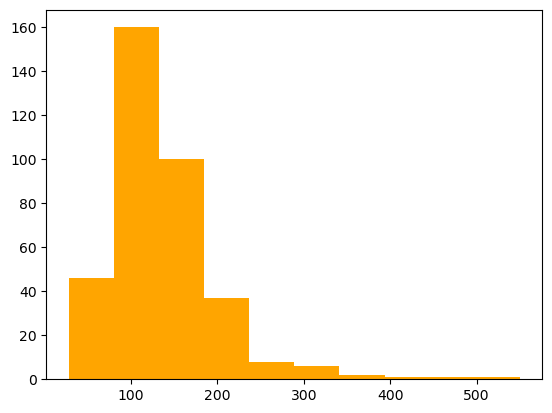

In [19]:
# Handling the missing values of LoanAmount

plt.hist(te['LoanAmount'], color = 'orange')
plt.show()

In [20]:
te['LoanAmount'] = te['LoanAmount'].fillna((te['LoanAmount']).median())

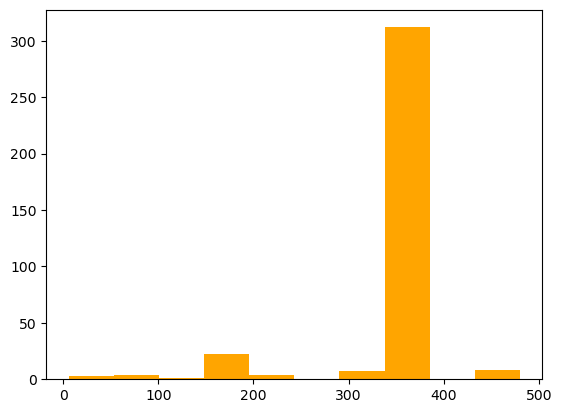

In [21]:
# Handling the missing values of Loan_Amount_Term

plt.hist(te['Loan_Amount_Term'], color = 'orange')
plt.show()

In [22]:
te['Loan_Amount_Term'] = te['Loan_Amount_Term'].fillna((te['Loan_Amount_Term']).median())

In [23]:
te.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [24]:
# ALL THE MISSING VALUES ARE HANDLED

# Outlier Detection

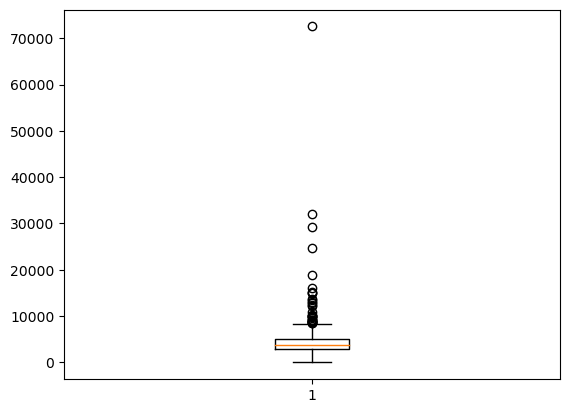

In [25]:
# Checking for outliers in ApplicantIncome

plt.boxplot(te['ApplicantIncome'])
plt.show()

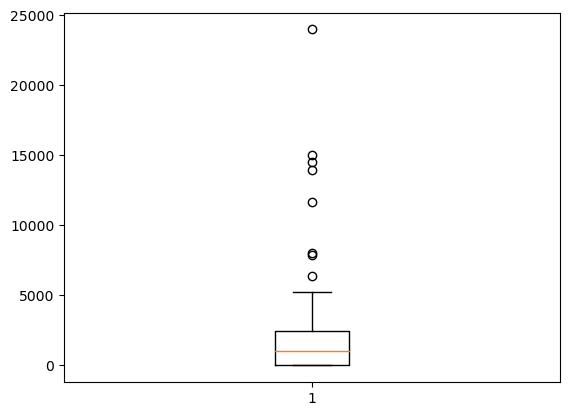

In [26]:
# Checking for outliers in CoapplicantIncome

plt.boxplot(te['CoapplicantIncome'])
plt.show()

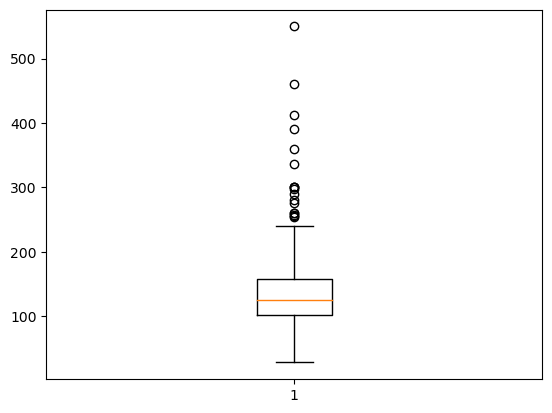

In [27]:
# Checking for outliers in LoanAmount

plt.boxplot(te['LoanAmount'])
plt.show()

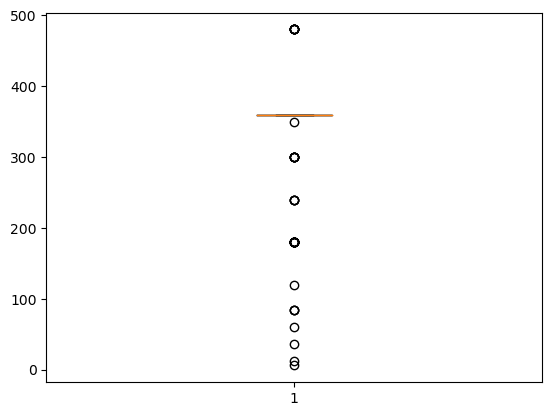

In [28]:
# Checking for outliers in Loan_Amount_Term

plt.boxplot(te['Loan_Amount_Term'])
plt.show()

In [29]:
te.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [30]:
# Applying a function for imputting method

def impute(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)

    iqr = q3 - q1
    
    up_lim = q3 + 1.5 * iqr
    low_lim = q1 - 1.5 * iqr
    
    print("IQR = ",iqr, " Upper limit = ",up_lim, " Lower limit = ",low_lim)
    
    return column.apply(lambda x: up_lim if x > up_lim else(low_lim if x < low_lim else x))

IQR =  2196.0  Upper limit =  8354.0  Lower limit =  -430.0


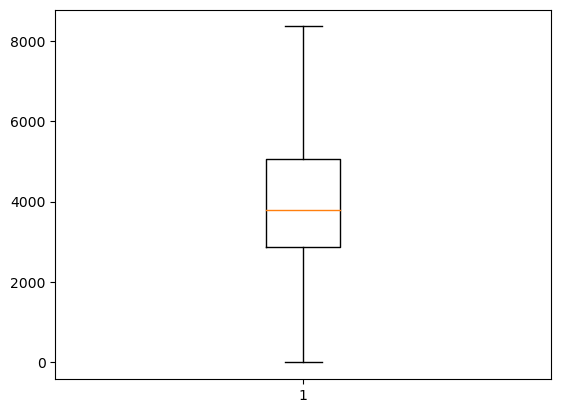

In [31]:
# Handling outliers of ApplicantIncome

te['ApplicantIncome'] = impute(te['ApplicantIncome'])
plt.boxplot(te['ApplicantIncome'])
plt.show()

IQR =  2430.5  Upper limit =  6076.25  Lower limit =  -3645.75


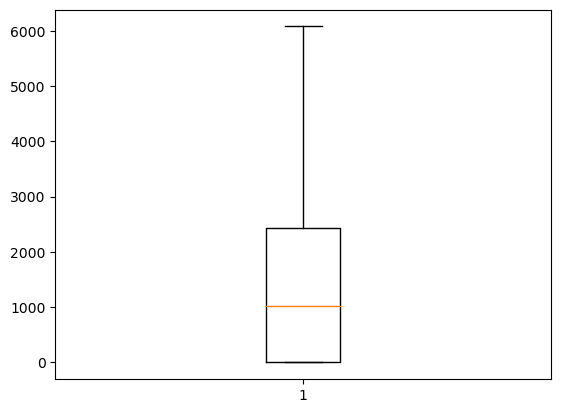

In [32]:
# Handling outliers of CoapplicantIncome

te['CoapplicantIncome'] = impute(te['CoapplicantIncome'])
plt.boxplot(te['CoapplicantIncome'])
plt.show()

IQR =  56.5  Upper limit =  242.25  Lower limit =  16.25


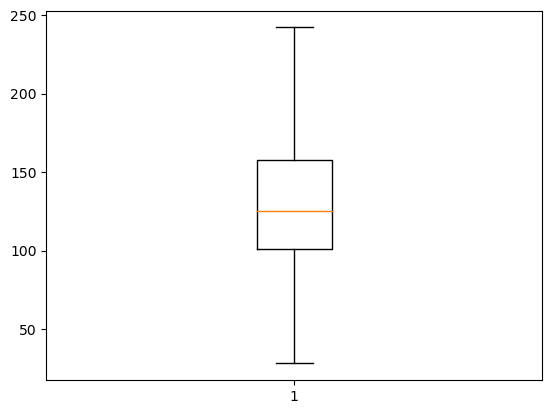

In [33]:
# Handling outliers of LoanAmount

te['LoanAmount'] = impute(te['LoanAmount'])
plt.boxplot(te['LoanAmount'])
plt.show()

IQR =  0.0  Upper limit =  360.0  Lower limit =  360.0


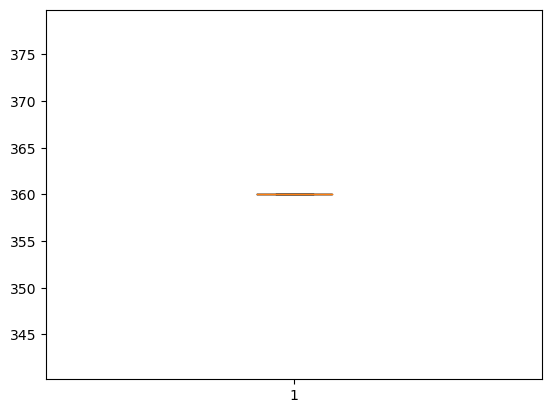

In [34]:
# Handling outliers of Loan_Amount_Term

te['Loan_Amount_Term'] = impute(te['Loan_Amount_Term'])
plt.boxplot(te['Loan_Amount_Term'])
plt.show()

# Encoding

In [35]:
# Label Encoding for Gender, Married, Education and Self_Employed

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

te['Gender'] = le.fit_transform(te['Gender'])
te['Married'] = le.fit_transform(te['Married'])
te['Education'] = le.fit_transform(te['Education'])
te['Self_Employed'] = le.fit_transform(te['Self_Employed'])

te.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720.0,0.0,110.0,360.0,1.0,Urban
1,LP001022,1,1,1,0,0,3076.0,1500.0,126.0,360.0,1.0,Urban
2,LP001031,1,1,2,0,0,5000.0,1800.0,208.0,360.0,1.0,Urban
3,LP001035,1,1,2,0,0,2340.0,2546.0,100.0,360.0,1.0,Urban
4,LP001051,1,0,0,1,0,3276.0,0.0,78.0,360.0,1.0,Urban


In [36]:
# dropping loan_ID

te.drop(columns = ['Loan_ID'], inplace = True)

In [37]:
te = pd.get_dummies(te,columns = ['Dependents','Property_Area'])

In [38]:
te.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,0,5720.0,0.0,110.0,360.0,1.0,True,False,False,False,False,False,True
1,1,1,0,0,3076.0,1500.0,126.0,360.0,1.0,False,True,False,False,False,False,True
2,1,1,0,0,5000.0,1800.0,208.0,360.0,1.0,False,False,True,False,False,False,True
3,1,1,0,0,2340.0,2546.0,100.0,360.0,1.0,False,False,True,False,False,False,True
4,1,0,1,0,3276.0,0.0,78.0,360.0,1.0,True,False,False,False,False,False,True


# Scaling

In [39]:
te.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [40]:
# Scaling using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

columns_to_scale = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

te[columns_to_scale] = min_max.fit_transform(te[columns_to_scale])

In [41]:
te.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,0,0.684702,0.000000,0.382730,0.0,1.0,True,False,False,False,False,False,True
1,1,1,0,0,0.368207,0.246863,0.457410,0.0,1.0,False,True,False,False,False,False,True
2,1,1,0,0,0.598516,0.296235,0.840140,0.0,1.0,False,False,True,False,False,False,True
3,1,1,0,0,0.280105,0.419008,0.336056,0.0,1.0,False,False,True,False,False,False,True
4,1,0,1,0,0.392147,0.000000,0.233372,0.0,1.0,True,False,False,False,False,False,True
